# HW2 Matplotlib and Numpy (70 points)

## Electronic submission due 11:59pm, Fri 2/24`

To complete this homework, you need to download the data file named gradebook.txt, which contain the grades of 100 students in a class. The data file contains 100 rows, each of which represents a student, and 20 columns: the first 10 columns are quizzes, the next 7 columns are homeworks, and the last three columns are exams. 

Complete the python script to analyze the data and produce several statistics and three figures (see example figures on the next page).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [7]:
#%% load data file

grades=pd.read_table('gradebook.txt',delimiter=' ', header=None).values

In [8]:
#%% 1. (5 points) Find out how many values in the array is negative or NaN, report the counts, and replace NaNs or negative values with 0.
gArray = np.array(grades)
s= 0
j= 0
s= len(gArray[:,] < 0)
gArray[gArray < 0] = 0
#print("gArray", gArray)
#print("NUM", newArray)
j= len(gArray[:,] == 0)
print('Number of NaNs: ', s)
print('Number of Zeros: ', j)


Number of NaNs:  100
Number of Zeros:  100


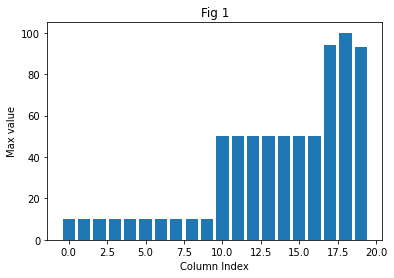

In [9]:
#%% 2. (10 points) Generate a bar chart for the max of each column (20 bars).
#Seems to be mostly correct except the x axis is slightly incorrect in label
maxColumn = gArray.max(axis = 0) #should be correct
xs = range(len(maxColumn))
plt.figure(1)
plt.bar( xs, maxColumn)
plt.xlabel('Column Index')
plt.ylabel('Max value')
plt.title('Fig 1')
plt.show()

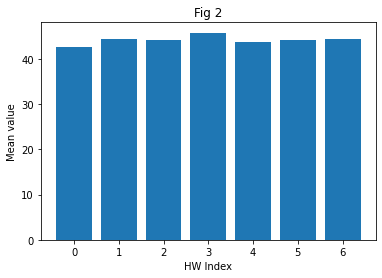

In [10]:
#%% 3.	(10 points) Generate a bar chart for the mean of each HW (7 bars).
#DONE
hwArr = gArray[:, 10:17]
plt.figure(2)
plt.bar( range(len(np.mean(hwArr, axis = 0))),np.mean(hwArr, axis = 0))
plt.xlabel('HW Index')
plt.ylabel('Mean value')
plt.title('Fig 2')
plt.show()

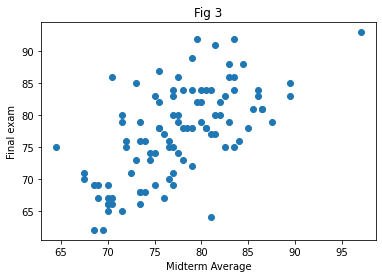

In [11]:
#%% 4.	(10 points) Scatter plot the average of the two midterm exams exam against the final exam.
#DONE
midArr = gArray[:, 17:19] #GETS THE MIDTERMS
finalArr = gArray[:,19]
#print("TOTAL", np.mean(midArr, axis = 1))
plt.figure(3)
plt.scatter(np.mean(midArr, axis = 1), finalArr)
#plt.xticks(xs, finalArr)
plt.xlabel('Midterm Average')
plt.ylabel('Final exam')
plt.title('Fig 3')
plt.show()


In [12]:
#%% 5.	(10 points). Sort the final exam score (last column) to find the row index with the top 5 highest scores and report. Also report their grades for the three exams.
#DONEISH, it may be missing something about ROW INDEX
midArr = gArray[:, 17:19] #GETS THE MIDTERMS
finalArr = gArray[:,19]
gradeArr = gArray[:,17:20] #gets all three here
#print("GRADEARR", gradeArr)
sortArr = gradeArr[np.argsort(gradeArr[:,2])]
#print("HERE",gradeArr[np.argsort(gradeArr[:,2])])
#print("DONE?", sortArr[-5:])
#if needde you could do a match and search using a for loop. then get every index one by one for each five and add them all to a list
print('Row index for the top-5 final exam scores:', sortArr[-5:, 2])
      
print('\nAll exam scores for the top-5 final exam scores:', sortArr[-5:])





Row index for the top-5 final exam scores: [89 91 92 92 93]

All exam scores for the top-5 final exam scores: [[ 82  76  89]
 [ 78  85  91]
 [ 78  81  92]
 [ 83  84  92]
 [ 94 100  93]]


In [13]:
#%% 6.	(15 points) Compute a final weighted average score of each student: divide each column by the max of that column and then multiple by 100; and then compute a weighted average where each quiz counts 2%, each hw counts 5%, exam 1 and 2 each of which counts 10%, and the final exam counts 25%. Round the final score to the nearest integer. Report the following statistics for the final scores: max, min, median, mean, standard deviation.
arrMax = gArray.max(axis = 0) #max of each column
print("ARRMAX", arrMax)
bArray = gArray.dot(np.diag(100/arrMax)) #divide by max times 100
weight = ([.02] * 10 + [.05] * 7 + [.10] * 2 + [.25] * 1) #get the weight of each for specific column   ###This is where I mainly have issues. I cant seem to figure this part and since I cant do this part I cant do question 7 easily.
#print("HERE", weight)
newArray = bArray.dot(weight) #multiply them? send to new value
np.round(newArray) #round it? at end for final score?
print("NEWARRAY", newArray)
print('Statistics  for final grade:')
print('\tmax: ', newArray.max())
print('\tmin: ', newArray.min())
print('\tmedian: ', np.median(newArray))
print('\tmean: ', newArray.mean() )
print('\tstd: ', newArray.std(axis=0, ddof=0))


ARRMAX [ 10  10  10  10  10  10  10  10  10  10  50  50  50  50  50  50  50  94
 100  93]
NEWARRAY [92.13017616 90.14813544 93.92905514 93.         94.26010066 77.65836193
 92.5104324  81.15225349 82.74566461 89.62312972 87.75204759 95.47931823
 85.53523221 79.15218485 93.96023793 82.39766644 93.36575154 73.78462594
 89.66575154 75.40091512 60.23136582 92.48490048 86.4594372  78.82724777
 95.79267902 65.79512697 86.92724777 82.70077785 87.98549531 96.56097003
 79.30816747 86.12093342 81.38416838 65.90150995 79.37199725 86.42651567
 92.98570121 91.80398078 82.49533288 82.04001373 71.06328071 73.56401281
 69.40077785 92.21681537 78.29519561 82.19579044 73.93276138 90.8280485
 68.87618394 78.35264242 74.58961336 86.42173416 77.95117822 76.90796156
 84.37032716 86.00324868 86.40889957 88.707504   78.67053306 85.98423702
 78.47039579 84.08476321 78.35138412 65.40789293 88.95424388 80.57199725
 68.38156028 89.6790437  76.51427591 83.17053306 86.35916266 87.6273164
 93.35364905 76.44479524 81

In [103]:
#%% 7.	(10 points) Count the number students whose final score is in the following range: < 60; >=60 and < 70, >=70 and < 80, >=80 and < 90, and >= 90, and plot the counts as a bar chart.
#combine 60 & 70, 70 & 80, 80 &90 for grading then plot them as a bar
finalScores = newArray[:6]
print("final", num)
plt.figure(4)
plt.bar( range(len(finalScores), finalScores)
plt.bar( range(len(finalScores), finalScores)
plt.bar( range(len(finalScores), finalScores)
plt.bar( range(len(finalScores), finalScores)
plt.bar( range(len(finalScores), finalScores)
#plt.bar( range(len(d)), len(d))
#plt.bar( range(len(cLow)), len(cLow) )
#plt.bar( range(len(c)) , len(c) )
#plt.bar( range(len(cMid)), len(cMid) )
#plt.bar( range(len(b)), len(b) )
#plt.bar( range(len(bMid)) , len(bMid))
#plt.bar( range(len(a)) , len(a))
categories = ('<60', '[60,70)', '[70,80)', '[80,90)', '>= 90')
plt.xticks(range(5), categories)
plt.ylabel('Number of students')
plt.xlabel('Final score')
plt.title('Fig 4')
plt.show()


SyntaxError: invalid syntax (Temp/ipykernel_2968/1278404647.py, line 7)